In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# type and shape of data
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


In [ ]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(50000, 1)


In [ ]:
print(type(x_test))
print(x_test.shape)

<class 'numpy.ndarray'>
(10000, 32, 32, 3)


In [ ]:
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(10000, 1)


In [ ]:
idx=12
x_train[idx]

[7]


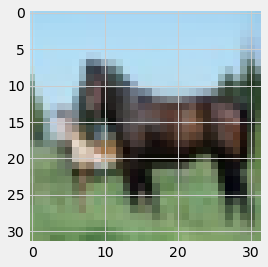

In [ ]:
# Show the image and label
img = plt.imshow(x_train[idx])
print(y_train[idx])

In [ ]:
# Get the image classification
classification = ['airplane','automobile','bird','cat', 'deer','dog','frog','horse','ship','truck']
print('The image class is:', classification[y_train[idx][0]])

The image class is: horse


In [ ]:
# Convert into a set of 10 numbers to input into the neural network
# for example for automobile would be [0100000000]
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# Normalize the values of the pixels to be between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Create model
model = Sequential()
#Add layers
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # reduce dimensionality
model.add(Dense(1000, activation='relu')) # 1000 neurons
model.add(Dropout(0.5)) # 50% dropout rate
model.add(Dense(500, activation='relu')) # 5000 neurons
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu')) # 5000 neurons
model.add(Dense(10, activation='softmax')) # 5000 neurons

In [ ]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train the model
hist = model.fit(x_train, y_train_one_hot
            ,batch_size=256,
            epochs=10,
            validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 335ms/step - loss: 1.7736 - accuracy: 0.3315 - val_loss: 1.5616 - val_accuracy: 0.4132
Epoch 2/10
157/157 [==============================] - 53s 336ms/step - loss: 1.4194 - accuracy: 0.4767 - val_loss: 1.2932 - val_accuracy: 0.5309
Epoch 3/10
157/157 [==============================] - 52s 330ms/step - loss: 1.2651 - accuracy: 0.5425 - val_loss: 1.1988 - val_accuracy: 0.5663
Epoch 4/10
157/157 [==============================] - 52s 329ms/step - loss: 1.1553 - accuracy: 0.5846 - val_loss: 1.1109 - val_accuracy: 0.6076
Epoch 5/10
157/157 [==============================] - 52s 330ms/step - loss: 1.0576 - accuracy: 0.6222 - val_loss: 1.0562 - val_accuracy: 0.6265
Epoch 6/10
157/157 [==============================] - 52s 330ms/step - loss: 0.9833 - accuracy: 0.6502 - val_loss: 1.0199 - val_accuracy: 0.6406
Epoch 7/10
157/157 [==============================] - 52s 332ms/step - loss: 0.9207 - accuracy: 0.6751 - val_loss: 0.9795 - val_ac

In [ ]:
# Evaluate model with the test dataset
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 5s 14ms/step - loss: 0.9573 - accuracy: 0.6716


[0.95731121301651, 0.6715999841690063]

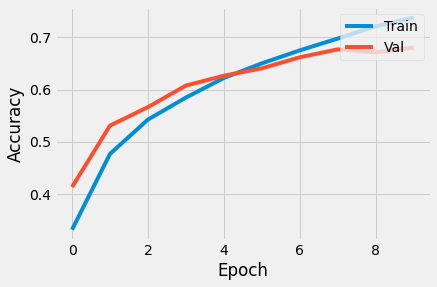

In [ ]:
# Visualize accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')

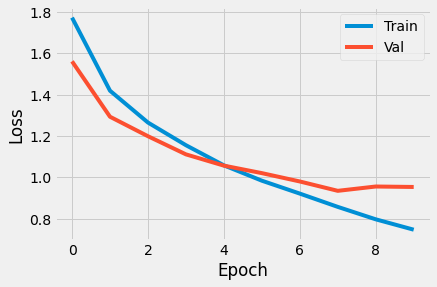

In [ ]:
# Visualize loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')

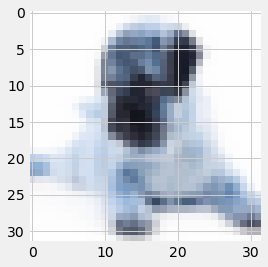

In [ ]:
#show image
import cv2 as cv
from skimage.transform import resize
resized = resize(cv.imread('dog.webp'), (32,32,3))
img = plt.imshow(resized)

In [ ]:
# get predictions for the photo
predictions = model.predict(np.array([resized]))
predictions

array([[3.6725128e-01, 3.7135385e-04, 4.9291235e-01, 1.1212641e-01,
        1.1921349e-03, 1.9911252e-02, 5.2870048e-04, 8.5099047e-04,
        3.7360345e-03, 1.1195146e-03]], dtype=float32)

In [ ]:
predictions[0][0]

0.36725128

In [ ]:
# sort predictions from highier to lower
sorted = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if  x[0][sorted[i]] > x[0][sorted[j]]:
      temp = sorted[i]
      sorted[i] = sorted[j]
      sorted[j] = temp

sorted

[2, 0, 3, 5, 8, 4, 9, 7, 6, 1]

In [ ]:
# print the first 5 predictions
for i in range(5):
  print(classification[sorted[i]], ':', predictions[0][sorted[i]]*100, '%')

bird : 49.29123520851135 %
airplane : 36.72512769699097 %
cat : 11.21264100074768 %
dog : 1.9911251962184906 %
ship : 0.37360345013439655 %
